In [1]:
from typing import List, Literal

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import make_blobs

In [2]:
student_id = 994023037
np.random.seed(student_id)

In [3]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=student_id
)

In [5]:
split_line = 0.8
q1 = int(np.ceil(X.shape[0] * split_line))
x_train, y_train = X[0:q1, :], y[0:q1]
x_test, y_test = X[q1:, :], y[q1:]

In [6]:
class KMeans :
    def __init__(
        self,
        n_clusters:int,
        centroid_init:List[Literal["kmeans++", "random"]] = "random",
        max_iter:int = 10,
    ) -> None:
        self.n_clusters = n_clusters
        self.centroid_init = centroid_init
        self.max_iter = max_iter
    
    @staticmethod
    def get_distance(x1, x2) :
        return np.linalg.norm(x1 - x2, axis=1)
    
    def _set_centroids(self) :
        if self.centroids is None : # initializing the centroids for the first time
            if self.centroid_init == "random" :
                chosen_centroids_index = np.random.randint(0, self.n_samples+1, size=self.n_clusters)
                self.centroids = self.X[chosen_centroids_index]
            elif self.centroid_init == "kmeans++" :
                first_centroid = self.X[np.random.randint(0, self.n_samples+1, size=1)]
                other_centroid_indexes = np.argsort(
                    KMeans.get_distance(
                        first_centroid,
                        self.X
                    )
                )[-1*(self.n_clusters-1):] # here we get the last (n_clusters-1) samples that are far from the first centroid
                self.centroids = np.concatenate(
                    [
                        first_centroid.reshape(1, self.n_features),
                        self.X[other_centroid_indexes]
                    ],
                    axis=0
                )
        else :
            for index in range(self.n_clusters) :
                new_centroid = self.X[self.clusters == index].mean(axis=0)
                self.centroids[index] = new_centroid

    def fit(self, x) :
        self.X = x
        self.n_samples, self.n_features = x.shape
        self.centroids = None 
        self.clusters = np.empty(shape=(self.n_samples,))

    def predict(self) :
        for _ in range(self.max_iter) :
            self._set_centroids()
            prev_clusters = self.clusters.copy()
            for index, sample in enumerate(self.X) :
                distance = self.get_distance(sample, self.centroids) # distance from eah centroid
                closest_centroid_index = np.argmin(distance)
                self.clusters[index] = closest_centroid_index
            if np.equal(prev_clusters, self.clusters).all() : # check if anything has changed since the last update
                break


In [7]:
model = KMeans(
    n_clusters=4,
    centroid_init="kmeans++",
    max_iter=10,
)
model.fit(X)
model.predict()

___

In [28]:
def visualize_clusters(X, labels, centroids):
    plt.figure(figsize=(6, 4))

    # Plotting the data points
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

    # Plotting centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

    plt.title('KMeans Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

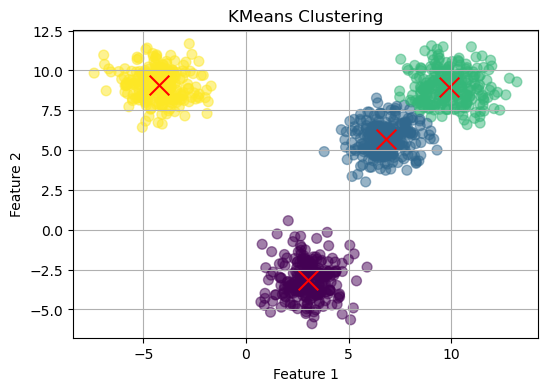

In [29]:
visualize_clusters(X, model.clusters, model.centroids)